<center>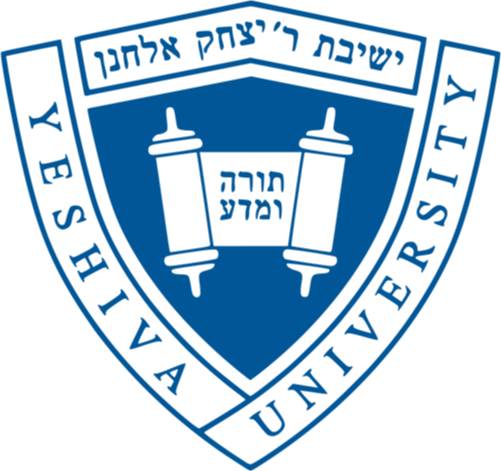</center>

<h1 style='text-align: center;'>Katz School of Science and Health</h1>
<h1 style='text-align: center;'>AIM 5005 Machine Learning</h1>
<p>
<h2 style='text-align: center;'>Homework 05</h1>
<br><br>

<h3 style='text-align: center;'>Radek Jan Holik</h3>
<br>
<br>

# Implement Principal Component Analysis (PCA)

In [326]:
# Load packages
import numpy as np 
from numpy import log,dot,exp,shape
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.manifold import TSNE

## 1. Implement PCA (40 points)

In [327]:
# Principal Component Analysis (PCA)
def pca(X, k_components):
    
    # N : of features
    # M : data
    N , M = X.shape

    # Step 1 : Compute sample mean
    meanX = np.mean(X, axis = 1)
    meanX = meanX[:, np.newaxis]

    # Step 2 : Center data at zero
    fi = X - meanX

    # Step 3 : Sample covariance matrix
    covMat = 1/M * fi @ fi.T # np.cov(fi)

    # Step 4 : Compute the eigenvalues/eigenvectors
    # returned eigenvectors are normalized
    eigenvalues, eigenvectors = np.linalg.eig(covMat)

    # Sort the eigenvalues and eigenvectors in descending order (just in case)
    sorted_idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_idx]
    eigenvectors = eigenvectors[:, sorted_idx]

    # Step 5 : Dimensionality reduction step - Select the top k_components (eigenvectors)
    reducedEigenvectors = eigenvectors[:, :k_components]

    # Step 6 : Project the data onto the new basis (only real part)
    reducedX = (reducedEigenvectors.T @ X).real

    return reducedX

## 2. load data.mat file and reduce dimensionality of x to 2 dimensions  (30 points)

In [328]:
data = loadmat("./data/data.mat")
X = data['x'].T
y = data['y'].T

In [329]:
# Check the shape of data (N : of features, M : data)
X.shape

(1000, 567)

In [330]:
# Check the shape of y (M : data)
y.shape

(1, 567)

In [331]:
# Extract the first two features
reducedX = pca(X, 2)

In [332]:
# Check the shape of data
reducedX.shape

(2, 567)

## 3. Plot the reduced 2 dimensions and show the color based on y  (10 points)

In [333]:
# Sort y and sort X based on y (just in case)

# Get indices that would sort array a
indices = np.argsort(y)

# # Use indices to sort both arrays
y = y[0, indices]
reducedX = reducedX[:, indices].reshape(reducedX.shape)

In [334]:
# Find the intervals for each unique value of y
indexIntervals = []
unique = np.unique(y)

for u in unique:
   minIdx = np.min(np.where(y.flatten() == u))
   maxIdx = np.max(np.where(y.flatten() == u))
   indexIntervals.append((minIdx, maxIdx))

indexIntervals

[(0, 91), (92, 173), (174, 267), (268, 366), (367, 466), (467, 566)]

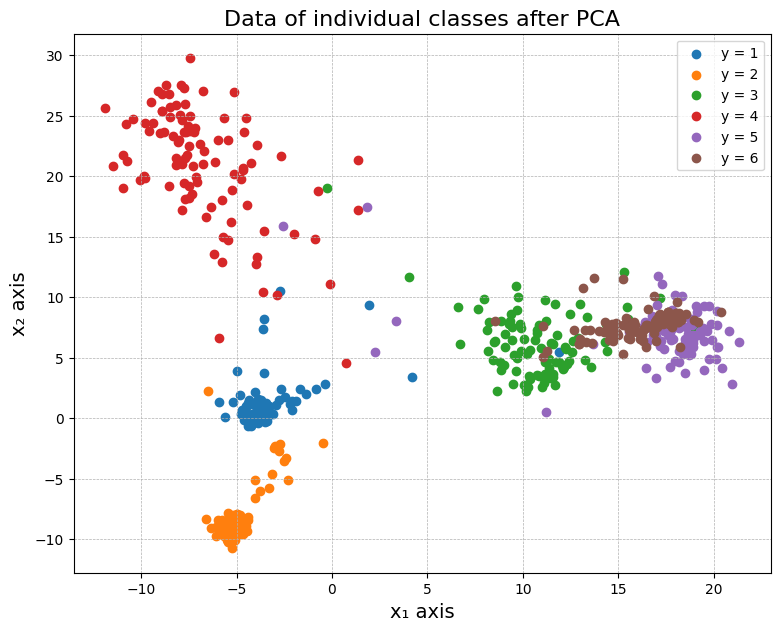

In [335]:
# Plot data
plt.figure(figsize = (9, 7))
for i, v in enumerate(indexIntervals):
    minI = v[0]
    maxI = v[1]
    plt.scatter(reducedX[0, minI:maxI], reducedX[1, minI:maxI])
plt.legend(['y = ' + str(s) for s in unique])
plt.xlabel("x₁ axis", fontsize = 14)
plt.ylabel("x₂ axis", fontsize = 14)
plt.title('Data of individual classes after PCA', fontsize = 16)
plt.grid(linestyle='--', linewidth=0.5)
plt.show()

## 4. Compare the results with the t-SNE view from sklearn  (10 points)

In [363]:
# t-SNE : t-distributed stochastic neighbor embedding
n_components = 2
tsne = TSNE(n_components, learning_rate='auto', random_state = 0, perplexity = 50.0).fit_transform(X.T).T
tsne.shape

(2, 567)

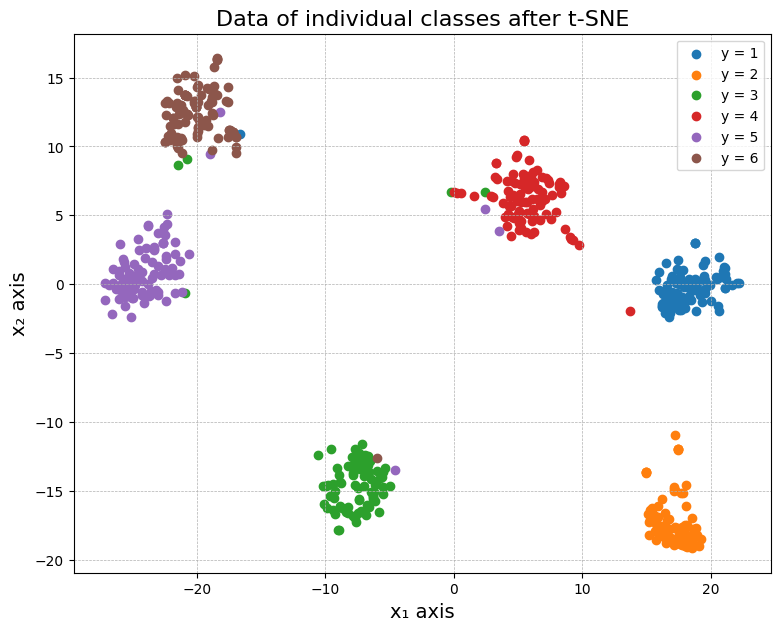

In [364]:
# Plot data
plt.figure(figsize = (9, 7))
for i, v in enumerate(indexIntervals):
    minI = v[0]
    maxI = v[1]
    plt.scatter(tsne[0, minI:maxI], tsne[1, minI:maxI])
plt.legend(['y = ' + str(s) for s in unique])
plt.xlabel("x₁ axis", fontsize = 14)
plt.ylabel("x₂ axis", fontsize = 14)
plt.title('Data of individual classes after t-SNE', fontsize = 16)
plt.grid(linestyle='--', linewidth=0.5)
plt.show()

#### __From the above figures, one can observe the different distribution of data (2D) from PCA and t-SNA. This is due to the different approaches of these techniques. The details are explained in the following paragraph.__

## 5. Explain the differences and why (10 points)

#### __Generally, PCA and t-SNE are both useful techniques for reducing the dimensionality of high-dimensional data. PCA finds the directions of maximum variance in the data and projects the data in those directions. This means that PCA is good at capturing linear relationships in the data. The result of the data after PCA is a set of principal components that represent the axes of maximum variance in the data. On the other hand, t-SNE preserves the local structure of the data in the lower-dimensional space. This means that t-SNE is good at acquiring nonlinear relationships in the data. The result of the data after t-SNE is a plot where points that are close together in the high-dimensional space are also close together in the low-dimensional space, and points that are far apart in the high-dimensional space are also far apart in the low-dimensional space.__

# References

- Numpy subtract every row of matrix by vector : https://stackoverflow.com/questions/26333005/numpy-subtract-every-row-of-matrix-by-vector

- Sort eigenvalues and associated eigenvectors after using numpy.linalg.eig in python : https://stackoverflow.com/questions/8092920/sort-eigenvalues-and-associated-eigenvectors-after-using-numpy-linalg-eig-in-pyt

- How can I "zip sort" parallel numpy arrays? : https://stackoverflow.com/questions/1903462/how-can-i-zip-sort-parallel-numpy-arrays

- An Introduction to t-SNE with Python Example : https://towardsdatascience.com/an-introduction-to-t-sne-with-python-example-5a3a293108d1

- Understanding PCA and T-SNE intuitively : https://medium.com/analytics-vidhya/understanding-pca-and-t-sne-intuitively-f8f0e196aee4